<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Face-Mask-Detection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Face Mask Detection**
Masks play a crucial role in protecting the health of individuals against respiratory diseases, as is one of the few precautions available for COVID-19 in the absence of immunization. With this dataset, it is possible to create a model to detect people wearing masks, not wearing them, or wearing masks improperly.

![picture](https://drive.google.com/uc?export=view&id=1wV6LBCqwslKLVYTinZs4k5dItlyKS4rv)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='drive/My Drive/Dataset'

**Importing the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

**Importing the Dataset**

In [ ]:
face = cv2.CascadeClassifier(path+"/FaceRecognition.xml")
model = load_model(path+"/mask_recog.h5")

**Mask Recognition Algorithm**

In [ ]:
def face_mask_detector(frame):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = face.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(60, 60),flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]

  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)

      if len(faces_list)>0:
          preds = model.predict(faces_list)

      for pred in preds:
          (mask, withoutMask) = pred

      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)

  return frame

**Test Image 1**

1/1 [==============================] - 2s 2s/step


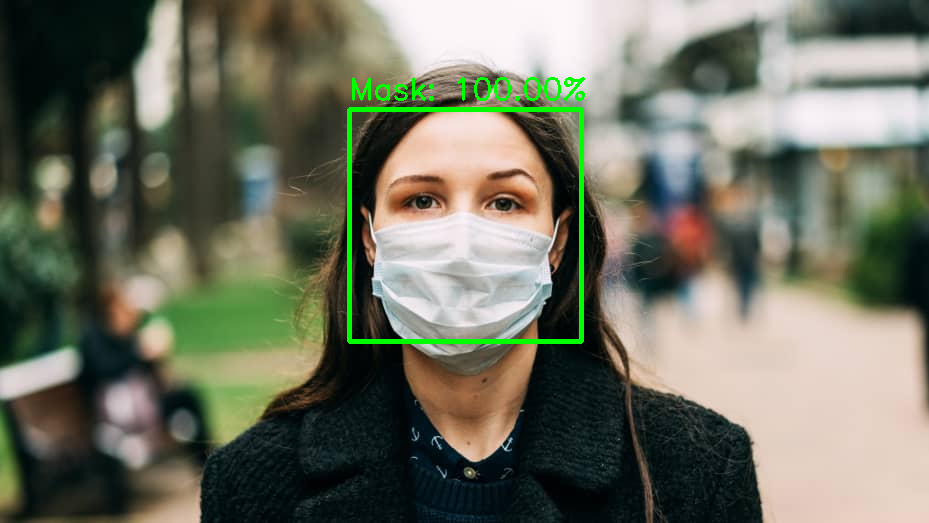

In [ ]:
input_image = cv2.imread(path+"/image1.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

**Test Image 2**

1/1 [==============================] - 0s 97ms/step


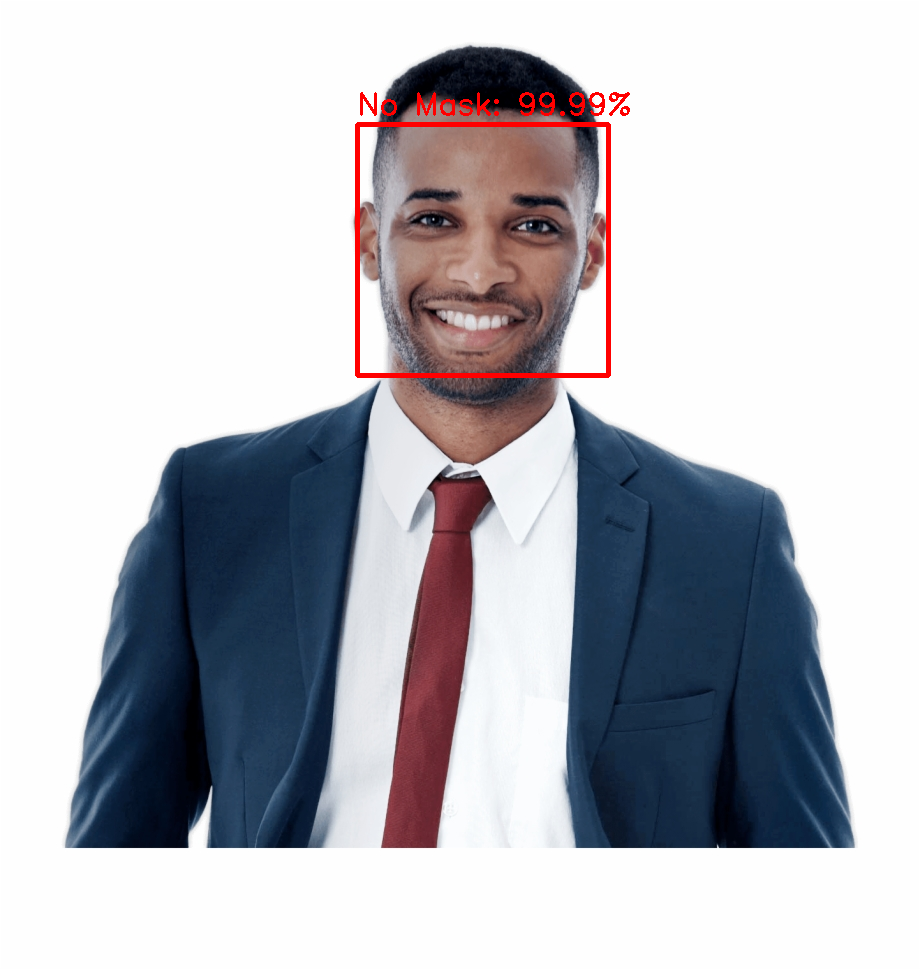

In [ ]:
input_image = cv2.imread(path+"/image2.png")
output = face_mask_detector(input_image)
cv2_imshow(output)